In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-white.csv', sep = ';', engine = 'python')

In [3]:
X = data.drop(('quality'), axis = 1) 
for i in X.columns:
    max(X[i])
    X[i]=X[i]/max(X[i])#Нормализация
Y_x = data['quality']
feature_names = X.columns

In [4]:
y=np.zeros(len(Y_x))

In [5]:
for i in range(len(y)-1):
    if Y_x[i] >=7:
        y[i]=1
    else:
        y[i]=0

In [6]:
print(X.shape)
print(y.shape)
N, d = X.shape

(4898, 11)
(4898,)


In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3428 1470


F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
def Fibonacci():
    cache = [1, 2]
    def internal(count, offset=0, cache=cache):
        if len(cache) >= offset + count:
            return cache[offset:offset + count]

        cache += [sum(cache[len(cache) - 2: len(cache)])]
        print(cache)

        return internal(count, offset, cache)
    
    return internal
fibonacci = Fibonacci()

In [9]:
from sklearn.base import clone as clone_estimator

In [10]:
def grid_search(algorithm, X_train, Y_train, X_test, Y_test, param_key, param_values, visualize = False, oob = False, bootstrap = False):
    errors_test = []
    errors_train = []
    errors_oob = []
    best_error = 1
    best_param_value = param_values[0]
    best_estimator = None
    
    for param in param_values:
        params = dict({})
        params[param_key] = param

        if oob:
            params['oob_score'] = True
        if bootstrap:
            params['bootstrap'] = True
        
        estimator = clone_estimator(algorithm, safe=True)
        estimator.set_params(**params)
        estimator.fit(X_train, y_train)
        
        err_train = np.mean(y_train != estimator.predict(X_train))
        err_test  = np.mean(y_test  != estimator.predict(X_test))
        
        errors_train.append(err_train)
        errors_test.append(err_test)

        if (oob):
            errors_oob.append(1 - estimator.oob_score_)
            print(err_train, err_test, 1 - estimator.oob_score_)
        else:
            print(err_train, err_test)
            
        
        if (err_test < best_error):
            best_error = err_test
            best_param_value = param
            best_estimator = estimator
            
    if visualize:
        plt.plot(param_values, errors_train, color='red')
        plt.plot(param_values, errors_test, color='blue')
        
        if oob:
            plt.plot(param_values, errors_oob, color='green')
            plt.legend(['Error train', 'Error test', 'OOB error'])
        else:
            plt.legend(['Error train', 'Error test'])

        plt.ylabel('n_estimators')
        plt.xlabel('error')
        plt.show()

            
        
    return best_estimator, best_param_value, best_error

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

F:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
rf = RandomForestClassifier()

[1, 2, 3]
[1, 2, 3, 5]
[1, 2, 3, 5, 8]
[1, 2, 3, 5, 8, 13]
[1, 2, 3, 5, 8, 13, 21]
[1, 2, 3, 5, 8, 13, 21, 34]
[1, 2, 3, 5, 8, 13, 21, 34, 55]
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]
0.07409568261376896 0.19931972789115646 0.2103267211201867
0.062427071178529754 0.15578231292517006 0.20303383897316218
0.030921820303383897 0.1598639455782313 0.19515752625437577


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

0.019836639439906652 0.13945578231292516 0.18319719953325553
0.01721120186697783 0.13673469387755102 0.16744457409568259


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.003500583430571762 0.13129251700680272 0.15140023337222874
0.0029171528588098016 0.12993197278911564 0.14906651108518088
0.0008751458576429405 0.12244897959183673 0.13652275379229872
0.0 0.12244897959183673 0.1362310385064177
0.0 0.11972789115646258 0.13360560093348894
0.0 0.11156462585034013 0.13273045507584602
0.0 0.11496598639455782 0.132147024504084
0.0 0.11156462585034013 0.1283547257876313
0.0 0.11292517006802721 0.12952158693115523
0.0 0.11292517006802721 0.12952158693115523


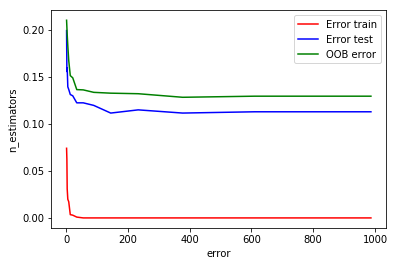

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=144, n_jobs=1,
             oob_score=True, random_state=None, verbose=0, warm_start=False),
 144,
 0.11156462585034013)

In [13]:
grid_search(rf, X_train, y_train, X_test, y_test, 'n_estimators', fibonacci(15), True, True)

# Extremely Randomized Trees

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
ert = ExtraTreesClassifier()

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

0.0749708284714119 0.20136054421768707 0.2112018669778296
0.07001166861143523 0.1619047619047619 0.20565927654609106
0.03354725787631272 0.16394557823129252 0.20303383897316218
0.019836639439906652 0.14489795918367346 0.18115519253208867


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.01633605600933489 0.13537414965986394 0.1782380396732789
0.005250875145857643 0.12789115646258503 0.15431738623103852
0.0014585764294049008 0.12380952380952381 0.14877479579929986
0.0008751458576429405 0.11564625850340136 0.1353558926487748
0.00029171528588098014 0.11700680272108843 0.13302217036172692
0.0 0.11360544217687076 0.13302217036172692
0.0 0.11904761904761904 0.13010501750291714
0.0 0.11632653061224489 0.131855309218203
0.0 0.11360544217687076 0.12747957992998837
0.0 0.11360544217687076 0.12368728121353556
0.0 0.11428571428571428 0.12572928821470242


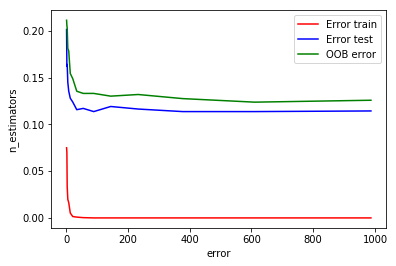

(ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
 89,
 0.11360544217687076)

In [16]:
grid_search(ert, X_train, y_train, X_test, y_test, 'n_estimators', fibonacci(15), True, True, True)

# Ada Boost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
ada = AdaBoostClassifier()

0.2132438739789965 0.22380952380952382
0.2234539089848308 0.23197278911564626
0.20828471411901983 0.21836734693877552
0.205950991831972 0.21360544217687075
0.19574095682613768 0.21428571428571427
0.1971995332555426 0.2054421768707483
0.18698949824970829 0.20748299319727892
0.18582263710618435 0.19795918367346937
0.17561260210035007 0.18843537414965986
0.16511085180863477 0.18299319727891156
0.15635939323220538 0.18775510204081633
0.1528588098016336 0.1891156462585034
0.14002333722287047 0.18503401360544217
0.12835472578763127 0.18435374149659864
0.12047841306884481 0.18095238095238095


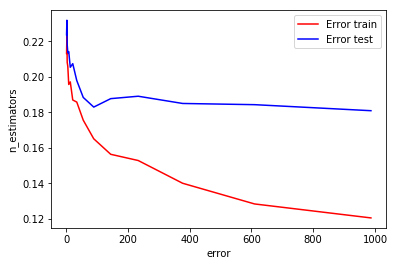

(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=987, random_state=None),
 987,
 0.18095238095238095)

In [19]:
grid_search(ada, X_train, y_train, X_test, y_test, 'n_estimators', fibonacci(15), True)

# GBT

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gbt = GradientBoostingClassifier()

0.2132438739789965 0.22380952380952382
0.2132438739789965 0.22380952380952382
0.2132438739789965 0.22380952380952382
0.2132438739789965 0.22380952380952382
0.2132438739789965 0.22380952380952382
0.1954492415402567 0.20612244897959184
0.1709451575262544 0.1870748299319728
0.15256709451575262 0.17755102040816326
0.14381563593932323 0.1761904761904762
0.13273045507584597 0.16802721088435374
0.1117269544924154 0.1598639455782313
0.08984830805134189 0.15374149659863945
0.05863477246207701 0.1510204081632653
0.027421236872812137 0.1435374149659864
0.011376896149358226 0.13673469387755102


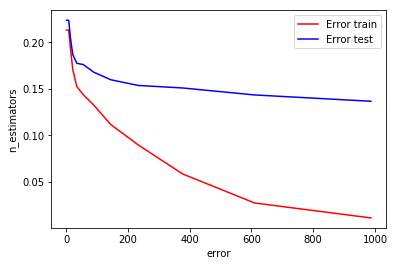

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=987,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False), 987, 0.13673469387755102)

In [22]:
grid_search(gbt, X_train, y_train, X_test, y_test, 'n_estimators', fibonacci(15), True)